In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
fitter = fitting.LinearLSQFitter()
from scipy.ndimage import median_filter
from sklearn.preprocessing import MinMaxScaler
from astropy.modeling import models, fitting
fitter = fitting.LinearLSQFitter()
from scipy.ndimage import median_filter

In [2]:
fname1='../../LMC/Type1/archive/ADP.2020-11-16T18:05:28.383.fits'
fname2='../../LMC/Type1/OGLEJ050646.31-6843094/ADP.2021-02-01T09:58:47.729.fits'
fname3='../../LMC/Type1/OGLEJ050650.94-700052.7/ADP.2020-11-16T16:11:14.683.fits'
fname4='../../LMC/Type1/OGLEJ050652.74-683437.4/ADP.2021-02-16T14:21:09.624.fits'
mu_cent='../../LMC/Mu_Centauri/ADP.2016-09-21T11:56:32.916.fits'
fits.getheader(mu_cent)
scaler = MinMaxScaler()

In [3]:
#fits.getheader(fname1)

In [4]:
xd1 = fits.getdata(fname1)
xd2 = fits.getdata(fname2)
xd3 = fits.getdata(fname3)
xd4 = fits.getdata(fname4)
cent=fits.getdata(mu_cent)
xd1

FITS_rec([([4726.42134757, 4726.43563192, 4726.44991628, ..., 6834.99262716, 6835.00956059, 6835.02649402], [   0.      ,    0.      ,    0.      , ...,    0.      ,    0.      ,    0.      ], [  1.       ,   1.       ,   1.       , ...,   1.       ,   1.       ,   1.       ], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00], [  0.       ,   0.       ,   0.       , ...,   0.       ,   0.       ,   0.       ], [ 0.        ,  0.        ,  0.        , ...,  0.07948042,  0.07948066,  0.0794809 ])],
         dtype=(numpy.record, [('WAVE', '>f8', (131591,)), ('FLUX_REDUCED', '>f4', (131591,)), ('ERR_REDUCED', '>f4', (131591,)), ('BGFLUX_REDUCED', '>f4', (131591,)), ('FLUX', '>f4', (131591,)), ('ERR', '>f4', (131591,))]))

In [5]:
xd1['WAVE'][0][4145:-1697], xd1['FLUX'][0][4145:-1697]

(array([4785.62999505, 4785.6442794 , 4785.65856375, ..., 6806.25659697,
        6806.2735304 , 6806.29046383], shape=(125749,), dtype='>f8'),
 array([148.36493, 148.36609, 154.11218, ..., 136.57271, 134.39937,
        134.3997 ], shape=(125749,), dtype='>f4'))

In [6]:
#plt.hist(xd1['FLUX'][0][4145:-1697], bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')

In [7]:
b1 = fits.getval(fname1,"WAVELMIN")
m1 = fits.getval(fname1,"SPEC_BIN")

In [8]:
#star 1
xd1_new=xd1['FLUX'][0][4145:-1719].tolist()
xd1_filt=median_filter(xd1_new,250)
lam1 = xd1['WAVE'][0][4145:-1719]

mask_alpha1=np.abs(6562.8-lam1)>40
mask_beta1=np.abs(4861.33333333333-lam1)>40
mask_gamma1=np.abs(4367.23-lam1)>50 #H_gamma está corrido
mask1=mask_alpha1&mask_beta1&mask_gamma1

#star 2
xd2_new=xd2['FLUX'][0][4145:-1719].tolist()
xd2_filt=median_filter(xd2_new,250)
lam2 = xd2['WAVE'][0][4145:-1719]

mask_alpha2=np.abs(6562.8-lam2)>40
mask_beta2=np.abs(4861.33333333333-lam2)>40
mask_gamma2=np.abs(4367.23-lam2)>50 #H_gamma está corrido
mask2=mask_alpha2&mask_beta2&mask_gamma2

#star 3
xd3_new=xd3['FLUX'][0][4145:-1719].tolist()
xd3_filt=median_filter(xd3_new,250)
lam3 = xd3['WAVE'][0][4145:-1719]

mask_alpha3=np.abs(6562.8-lam3)>40
mask_beta3=np.abs(4861.33333333333-lam3)>40
mask_gamma3=np.abs(4367.23-lam3)>50 #H_gamma está corrido
mask3=mask_alpha3&mask_beta3&mask_gamma3

#MuCen
cent_new=cent['FLUX'][0][4145:-1719].tolist()
cent_filt=median_filter(cent_new,250)
lamc = cent['WAVE'][0][4145:-1719]

mask_alphac=np.abs(6562.8-lamc)>40
mask_betac=np.abs(4861.33333333333-lamc)>40
mask_gammac=np.abs(4367.23-lamc)>50 #H_gamma está corrido
maskc=mask_alphac&mask_betac&mask_gammac

In [9]:
modelo1 = fitter(models.Chebyshev1D(25),lam1[mask1],xd1_filt[mask1])
modelo2 = fitter(models.Chebyshev1D(25),lam2[mask2],xd2_filt[mask2])
modelo3 = fitter(models.Chebyshev1D(25),lam3[mask3],xd3_filt[mask3])
modeloc = fitter(models.Chebyshev1D(25),lamc[maskc],cent_filt[maskc])

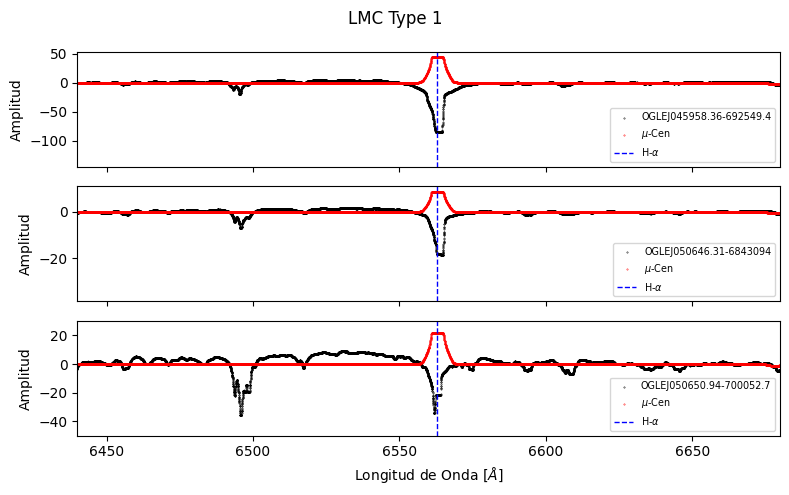

In [10]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 5))  # 5 rows, 1 column

# Plot each light curve
axs[0].scatter(lam1-5,xd1_filt-modelo1(lam1),s=0.1, color='black', label='OGLEJ045958.36-692549.4')
axs[0].scatter(lamc,(cent_filt-modeloc(lamc))*10,s=0.1, color='red',label=r'$\mu$-Cen')
axs[1].scatter(lam2-5,xd2_filt-modelo2(lam2), s=0.1, color='black',label='OGLEJ050646.31-6843094')
axs[1].scatter(lamc,(cent_filt-modeloc(lamc))*2,s=0.1, color='red',label=r'$\mu$-Cen')
axs[2].scatter(lam3-5,xd3_filt-modelo3(lam3), s=0.1, color='black',label='OGLEJ050650.94-700052.7')
axs[2].scatter(lamc,(cent_filt-modeloc(lamc))*5,s=0.1, color='red',label=r'$\mu$-Cen')
#axs[3].scatter(xd4['WAVE'][0]-4.5,xd4['FLUX'][0], s=0.1, color='black',label='OGLEJ050652.74-683437.4')
#axs[3].scatter(cent['WAVE'][0],cent['FLUX'][0]+40,s=0.1, color='red')



# Labels
for ax in axs:
    ax.set_ylabel('Amplitud') 
    ax.axvline(x=6562.8, color='blue', linestyle='--', linewidth=1,label=r'H-$\alpha$')
    ax.legend(loc='lower right', fontsize='x-small')
axs[-1].set_xlabel(r'Longitud de Onda [$\AA$]')
axs[-1].set_xlim(6440, 6680)
axs[2].set_ylim(-50, 30)
fig.suptitle('LMC Type 1')
plt.tight_layout()
plt.savefig('LMC_Type1')
plt.show()